# 3. Model building - Random Forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier


After obtaining cleaning up the data and selecting the variables, we will be trying to build a model to predict whether a stock if worth investing in depending on the column "Class". If class == 1, then it has a positive Price Var and its worth investing in. If class == 0, then it has a negative Price Var and its not worth investing in.

We will be using "Revenue", "EBITDA", "Profit Margin", "returnOnEquity", "Book Value per Share", "Operating Cash Flow", "Dividend Yield", "R&D Expenses" as our predictors.

In [2]:
df = pd.read_csv('2014_filtered.txt')
df

,Revenue,EBITDA,Profit Margin,returnOnEquity,Book Value per Share,Operating Cash Flow,Dividend Yield,R&D Expenses,PRICE VAR [%],Class,Sector
0,5.727000e+09,683400000.0,0.066,0.2041,6.706,634100000.0,0.0173,0.0,18.603845,1,Consumer Defensive
1,4.551600e+09,241900000.0,-0.021,-0.1154,2.211,536500000.0,0.0117,0.0,26.681241,1,Consumer Defensive
2,2.464867e+09,771439000.0,0.196,0.3189,3.020,597491000.0,0.0000,0.0,37.721889,1,Consumer Defensive
3,3.297600e+09,743500000.0,0.126,0.1969,7.779,540300000.0,0.0157,0.0,10.792636,1,Consumer Defensive
4,5.973810e+08,183876000.0,0.122,0.1289,10.909,111582000.0,0.0000,0.0,49.607672,1,Consumer Defensive
...,...,...,...,...,...,...,...,...,...,...,...
1516,1.185080e+08,9650000.0,0.034,0.1324,4.249,7612000.0,0.0000,0.0,-2.453386,0,Technology
1517,4.952987e+07,-53213.0,-0.002,-0.0097,4.505,523987.0,0.0000,0.0,29.362884,1,Technology
1518,1.532400e+08,20887000.0,0.085,0.3646,2.426,-1587000.0,0.0000,11326000.0,-31.167763,0,Technology
1519,3.407580e+08,8512000.0,0.017,0.1456,8.489,5745000.0,0.0395,0.0,7.779579,1,Technology


In [3]:
y = pd.DataFrame(df["Class"])

predictors = pd.DataFrame(df[["Revenue", "EBITDA", "Profit Margin", "returnOnEquity", "Book Value per Share", 
                                 "Operating Cash Flow", "Dividend Yield"]])
X = predictors

<ipython-input-6-f933f0314320>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(X_train, y_train)                         # train the model


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6947368421052632
True Postitive Rate 		: 0.5444646098003629
True Negative Rate 		: 0.8353140916808149
False Negative Rate 		: 0.455535390199637
False Postitive Rate 		: 0.16468590831918506

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6377952755905512
True Postitive Rate 		: 0.44642857142857145
True Negative Rate 		: 0.7887323943661971
False Negative Rate 		: 0.5535714285714286
False Postitive Rate 		: 0.2112676056338028



<AxesSubplot:>

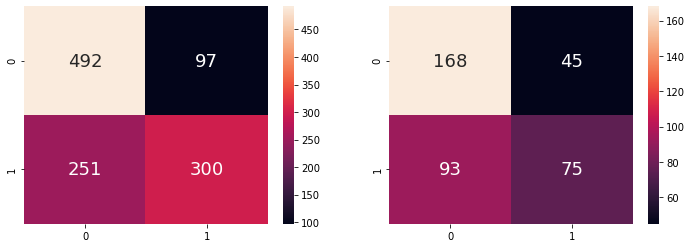

In [6]:
rforest = RandomForestClassifier(n_estimators = 500,  # n_estimators denote number of trees
                                 max_depth = 6)       # set the maximum depth of each tree

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 4)  # create the object
rforest.fit(X_train, y_train)                         # train the model

# Predict Response corresponding to Predictors
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

#Getting the confusion matrices
train_confusion = confusion_matrix(y_train, y_train_pred)

TP_train = train_confusion[1][1]
FN_train = train_confusion[1][0]
TN_train = train_confusion[0][0]
FP_train = train_confusion[0][1]

test_confusion = confusion_matrix(y_test, y_test_pred)

TP_test = test_confusion[1][1]
FN_test = test_confusion[1][0]
TN_test = test_confusion[0][0]
FP_test = test_confusion[0][1]

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print("True Postitive Rate \t\t:", TP_train/(TP_train+FN_train))
print("True Negative Rate \t\t:", TN_train/(TN_train+FP_train))
print("False Negative Rate \t\t:", FN_train/(FN_train+TP_train))
print("False Postitive Rate \t\t:", FP_train/(FP_train+TN_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print("True Postitive Rate \t\t:", TP_test/(TP_test+FN_test))
print("True Negative Rate \t\t:", TN_test/(TN_test+FP_test))
print("False Negative Rate \t\t:", FN_test/(FN_test+TP_test))
print("False Postitive Rate \t\t:", FP_test/(FP_test+TN_test))
print()


# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(train_confusion,
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(test_confusion, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Utilizing the random forest model, we managed to obtain a classification accuracy of around 0.69 for the training data set and a classification accuracy of around 0.63 for the test data set. 
Both of which are strongly(?) accurate. 

The random forest model also has a decent(?) true positive rate of 0.54 for the train and 0.44 for the test data sets. 
However, the true negative rate is high at 0.83 for the train and 0.78 for the test data set. A better model is needed to improve on the true positive rates. We thus, turn to Grid Search.